In [3]:
import yaml

# 打开并读取 YAML 文件
with open('./config.yaml', 'r') as file:
    config = yaml.safe_load(file)

# 输出解析后的 Python 字典
print(config)

# 访问特定配置项
print(config['training']['evaluate'])  # 输出: CNN

{'name': '验证码识别', 'dataset': {'name': 'captcha', 'train_total': 10000, 'test_total': 1000, 'captcha_length': 1, 'width': 200, 'height': 100, 'characters': '0123456789', 'train_dir': 'data/train', 'test_dir': 'data/test'}, 'model': {'type': 'CNN', 'layers': 5, 'activation': 'relu'}, 'training': {'train_dir': 'data/train', 'batch_size': 128, 'learning_rate': 0.001, 'epochs': 50, 'evaluate': True, 'model_path': './model/model.pth'}, 'testing': {'test_dir': 'data/test', 'model_path': './model/model.pth'}}
<class 'bool'>


In [7]:
loss_list = [2.3020607335567473, 2.039491341948509, 1.0194213927821256, 0.5158141216741351, 0.3220077866648753, 0.2706733280072217, 0.18498209164651813, 0.1611229153689681, 0.17335387797373533,
             0.1459376681901153, 0.14415635538482297, 0.13065030967203936, 0.10870517556085056, 0.09841014109749086, 0.1151253210754164, 0.13909800600919955, 0.10651186918238796, 0.10578753057510773, 0.13021349731665155]


class EarlyStopping:
    def __init__(self, patience=5, delta=0.0001):
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, loss):
        if self.best_loss is None:
            self.best_loss = loss
        elif self.best_loss - loss > self.delta:
            self.best_loss = loss
            self.counter = 0
        else:
            self.counter += 1
            print('Counter:', self.counter)
            if self.counter >= self.patience:
                self.early_stop = True
        return self.early_stop


early_stopping = EarlyStopping()
for epoch, loss in enumerate(loss_list):
    if early_stopping(loss):
        print('Early stopping..., epoch:', epoch)
        break
    print(loss)

2.3020607335567473
2.039491341948509
1.0194213927821256
0.5158141216741351
0.3220077866648753
0.2706733280072217
0.18498209164651813
0.1611229153689681
Counter: 1
0.17335387797373533
0.1459376681901153
0.14415635538482297
0.13065030967203936
0.10870517556085056
0.09841014109749086
Counter: 1
0.1151253210754164
Counter: 2
0.13909800600919955
Counter: 3
0.10651186918238796
Counter: 4
0.10578753057510773
Counter: 5
Early stopping..., epoch: 18


In [38]:
import torch

''.join(map(str, torch.tensor(list(map(int, '123')),  dtype=torch.uint8).tolist()))

'tensor(1, dtype=torch.uint8)tensor(2, dtype=torch.uint8)tensor(3, dtype=torch.uint8)'

In [42]:
import numpy as np

a = np.array([
    [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ],
    [
        [10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]
    ],
    [
        [19, 20, 21],
        [22, 23, 24],
        [25, 26, 27]
    ]
])

b = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

predict = a.argmax(axis=2, keepdims=True)
b.view_as(predict)

AttributeError: 'numpy.ndarray' object has no attribute 'view_as'

In [19]:
import numpy as np

a = np.array([
    [True, False, False],
    [True, True, False],
    [True, True, False]
])
np.any(a, axis=0).sum()

2

In [20]:
import numpy as np

a = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

a.reshape(-1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
import torch
import torch.nn as nn

# 创建 CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

# 假设模型输出 logits，形状为 (batch_size, num_classes)
logits = torch.tensor([
    [2.0, 1.0, 0.1],
    [1.0, 3.0, 0.2]
])

# 计算 softmax
probs = nn.functional.softmax(logits, dim=1)
print(probs)

# 假设真实标签，形状为 (batch_size,)
targets = torch.tensor([0, 1])  # 第一个样本真实类别为 0，第二个样本真实类别为 1

# 计算交叉熵损失
loss = criterion(logits, targets)

print(loss)

tensor([[0.6590, 0.2424, 0.0986],
        [0.1131, 0.8360, 0.0508]])
tensor(0.2981)


In [27]:
import torch
import torch.nn as nn

# 创建 Binary Cross-Entropy Loss
bce_loss = nn.BCELoss()

# 创建 CrossEntropyLoss
criterion = nn.CrossEntropyLossWithLogits()

# 假设模型的预测概率为 (batch_size,)
preds = torch.tensor([
    [0.9, 0.1],
    [0.2, 0.8],
    [0.7, 0.3]
])  # 模型预测的概率
labels = torch.tensor([1.0, 0.0, 1.0])  # 真实标签

# 计算损失
# loss = bce_loss(preds, labels)
# print(loss.item())

# 计算交叉熵损失
loss = criterion(preds, labels)
print(loss.item())

RuntimeError: expected scalar type Long but found Float

In [4]:
import numpy as np
a = np.array(
    [
        [
            [1, 2],
            [3, 4]
        ],
        [
            [4, 5],
            [6, 7]
        ],
    ]
)

a.shape, a.sum(axis=0)

((2, 2, 2),
 array([[ 5,  7],
        [ 9, 11]]))

In [6]:
import os
from captcha.image import ImageCaptcha

chars = '9'
captcha = ImageCaptcha(width=200, height=100)
img = captcha.generate_image(chars)
# captcha.create_noise_dots(img, '#000000', 4, 40)  # type: ignore
# captcha.create_noise_curve(img, '#000000')  # type: ignore
img.save('./9.png')

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class LocalizationNetwork(nn.Module):
    def __init__(self):
        super(LocalizationNetwork, self).__init__()

        # 定义卷积层
        # 1 个输入通道, 16 个输出通道, 7x7 卷积核
        self.conv1 = nn.Conv2d(1, 16, kernel_size=7)
        # 16 个输入通道, 32 个输出通道, 5x5 卷积核
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5)
        # 32 个输入通道, 64 个输出通道, 5x5 卷积核
        self.conv3 = nn.Conv2d(32, 64, kernel_size=5)

        # 全连接层，用于输出仿射变换的参数 (2x3)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)  # 计算卷积层输出的特征图大小后设置全连接层的输入大小
        self.fc2 = nn.Linear(128, 6)  # 输出 6 个仿射变换参数 (2x3 矩阵)

        # 初始化仿射变换为单位矩阵
        self.fc2.weight.data.zero_()
        self.fc2.bias.data.copy_(torch.tensor(
            [1, 0, 0, 0, 1, 0], dtype=torch.float))

    def forward(self, x):
        # 卷积层 + 池化
        # 输入: (128x128), 输出: (61x61)
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))  # 输入: (61x61), 输出: (29x29)
        x = F.relu(F.max_pool2d(self.conv3(x), 2))  # 输入: (29x29), 输出: (12x12)

        # 展平为全连接层输入
        x = x.view(-1, 64 * 12 * 12)

        # 全连接层
        x = F.relu(self.fc1(x))

        # 输出仿射变换参数
        theta = self.fc2(x)
        theta = theta.view(-1, 2, 3)  # 输出 2x3 仿射矩阵
        return theta


model = LocalizationNetwork()
x = torch.randn(1, 1, 128, 128)
model(x)

tensor([[[1., 0., 0.],
         [0., 1., 0.]]], grad_fn=<ViewBackward0>)

In [2]:
import time
start_time = time.time()
# 将时间戳浮点数转换为 10 位整形时间戳
int(time.time())

1725928990

In [1]:
len('123')

3

In [8]:
target_dir = 'train-3363-stable-new'


for i, img_name in enumerate(os.listdir('./data/train-3363-stable')):
    label = img_name.split('_')[1].split('.')[0]
    new_img_name = f'{label}_{i}.jpeg'
    os.rename(f'./data/train-3363-stable/{img_name}',
              f'./data/{target_dir}/{new_img_name}')

In [15]:
"""
验证码长度不固定，包含 4,5,6,7 个字符
"""

import os

target_dir = './data/train-3363-stable-new'
name_set = set()
for img_name in os.listdir(target_dir):
    label = img_name.split('_')[0]
    label_list = list(label)
    name_set.update(label_list)
name_set

{'0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'S',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [19]:
import os
import random
target_dir = './data/train-3363-stable-new'
name_list = []

for img_name in os.listdir(target_dir):
    if not img_name.endswith('.jpeg'):
        continue

    name_list.append(img_name)

# 打乱 name_list 列表
random.shuffle(name_list)
test_name_list = name_list[:300]
train_name_list = name_list[300:]

for i, img_name in enumerate(test_name_list):
    os.rename(f'{target_dir}/{img_name}',
              f'{target_dir}/test/{img_name}')

for i, img_name in enumerate(train_name_list):
    os.rename(f'{target_dir}/{img_name}',
              f'{target_dir}/train/{img_name}')

In [4]:
import os

test_target_dir = './data/train-3363-stable-new/test'
train_target_dir = './data/train-3363-stable-new/train'

len_dict = {
    4: 0,
    5: 0,
    6: 0,
}

name_dict = set()

for i, img_name in enumerate(os.listdir(test_target_dir) + os.listdir(train_target_dir)):
    new_img_name = img_name.split('_')[0]
    count = len(new_img_name)
    if count == 7:
        print(img_name)
    len_dict[count] += 1
    name_dict.update(new_img_name.lower())

len_dict, name_dict

({4: 1197, 5: 1073, 6: 1091},
 {'0',
  '1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'v',
  'w',
  'x',
  'y',
  'z'})

In [12]:
def get_max_length(captcha_length: str | int) -> int:
    """
    获取最大长度
    :param captcha_length: 验证码长度
    :return: 最大长度
    """
    return max(map(int, str(captcha_length).split('-')))

(2, 3)

In [38]:
import random

start, end = [3, 1]
start, end

(3, 1)

In [6]:
import torch
a = torch.tensor([
    [True, True],
    [False, True],
])

a.all(dim=-1, )

tensor([ True, False])

In [ ]:
import torch

a = torch.tensor([
    [1, 2],
    [3, 4],
])

torch.concat(a)

TypeError: concat(): argument 'tensors' (position 1) must be tuple of Tensors, not Tensor

In [ ]:
nn.AdaptiveAvgPool2d(output_size=(7, 7))

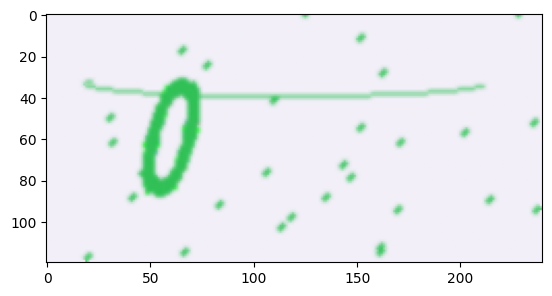

In [6]:
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

transform = transforms.Compose([
    transforms.Resize((50)),
    transforms.ToTensor()
])
img = Image.open('./data/demo/0_1.png')
img = transform(img)
# 显示图片
plt.imshow(img.permute(1, 2, 0))

In [6]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import random

# 生成随机字符


def random_char():
    return random.choice('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')

# 随机颜色1


def random_color1():
    return (random.randint(200, 255), random.randint(200, 255), random.randint(200, 255))

# 随机颜色2


def random_color2():
    return (random.randint(50, 150), random.randint(50, 150), random.randint(50, 150))

# 生成验证码图片


def generate_captcha():
    width = 120  # 图片宽度
    height = 50  # 图片高度
    image = Image.new('RGB', (width, height), (255, 255, 255))
    draw = ImageDraw.Draw(image)

    # 填充背景颜色
    for x in range(width):
        for y in range(height):
            draw.point((x, y), fill=random_color1())

    # 加载字体
    font = ImageFont.truetype('Arial.ttf', 27)  # 确保字体文件路径正确

    # 绘制文字
    captcha_text = ''.join(random_char() for _ in range(4))
    for i, char in enumerate(captcha_text):
        draw.text((30 * i + 10, 5), char, font=font, fill=random_color2())

    # 添加模糊滤镜
    # image = image.filter(ImageFilter.GaussianBlur(1))

    # 显示图片
    image.show()
    print(f"验证码内容: {captcha_text}")


generate_captcha()

验证码内容: mGya
